In [4]:
import pandas as pd

In [5]:
# 예제 데이터
data = pd.DataFrame({'Original': [1, 4, 16, 36, 100, 1000, 10000]})

In [6]:
import numpy as np

In [7]:
data['Log Trans'] = np.log1p(data['Original'])

data['sqr Trans'] = np.sqrt(data['Original'])

In [8]:
# pip install scikit-learn

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

In [10]:
# 데이터 생성
data1 = pd.DataFrame({'Original': [50,80,90,200,160]})

data2 = pd.DataFrame({'Fruits': ['사과', '배', '포도', '사과', '포도']})


# 표준화
scaler_1 = StandardScaler()
data1['scale'] = scaler_1.fit_transform(data1[['Original']])

# 정규화
scaler_2 = MinMaxScaler()
data1['scale_2']= scaler_2.fit_transform(data1[['Original']])


In [11]:
print(data1)

   Original     scale   scale_2
0        50 -1.192338  0.000000
1        80 -0.650366  0.200000
2        90 -0.469709  0.266667
3       200  1.517522  1.000000
4       160  0.794892  0.733333


In [14]:
# 레이블의 인코딩

encoder_1=LabelEncoder()
data2['Label Encoding'] = encoder_1.fit_transform(data2['Fruits'])

print(data2['Label Encoding'])



0    1
1    0
2    2
3    1
4    2
Name: Label Encoding, dtype: int64


In [ ]:
encoder_2=OneHotEncoder(sparse_output=False)

onhot_encoded = encoder_2.fit_transform(data2[['Label Encoding']])

onhot_col = encoder_2.get_feature_names_out()

onehot_df = pd.DataFrame(onhot_encoded, columns=onhot_col)

onehot_df

,Label Encoding_0,Label Encoding_1,Label Encoding_2
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0


In [25]:
data2=pd.concat([data2, onehot_df], axis=1)

In [26]:
print(data2)

  Fruits  Label Encoding  Label Encoding_0  Label Encoding_1  Label Encoding_2
0     사과               1               0.0               1.0               0.0
1      배               0               1.0               0.0               0.0
2     포도               2               0.0               0.0               1.0
3     사과               1               0.0               1.0               0.0
4     포도               2               0.0               0.0               1.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import skew, kurtosis

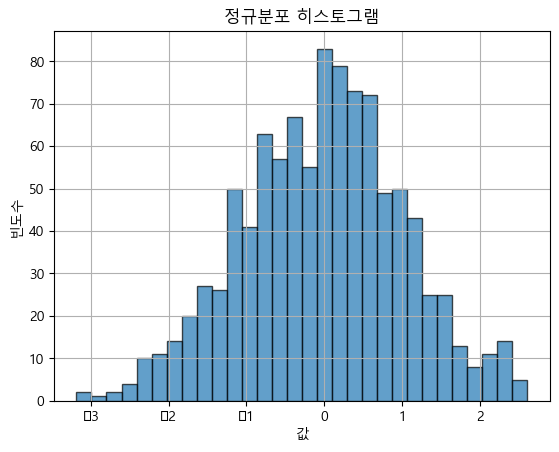

왜도 (Skewness): -0.0558
첨도 (Kurtosis): -0.1856


In [28]:


# 정규분포 데이터 생성 (평균=0, 표준편차=1, 1000개 샘플)
data = np.random.normal(loc=0, scale=1, size=1000)

# 데이터프레임으로 변환 (선택사항)
df = pd.DataFrame(data, columns=['값'])

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 정규분포 히스토그램 시각화
plt.hist(df['값'], bins=30, edgecolor='black', alpha=0.7)
plt.title('정규분포 히스토그램')
plt.xlabel('값')
plt.ylabel('빈도수')
plt.grid(True)
plt.show()


# 왜도(Skewness) 계산
skewness = skew(df['값'])
print(f"왜도 (Skewness): {skewness:.4f}")

# 첨도(Kurtosis) 계산
kurt = kurtosis(df['값']) # Fisher 방식 (정규분포면 0이 나옴)
print(f"첨도 (Kurtosis): {kurt:.4f}")

In [29]:
import pandas as pd

# 고객 정보 데이터프레임
customers = pd.DataFrame({
    'customer_id': [1, 2, 3],
    'name': ['Alice', 'Bob', 'Charlie']
    })

# 주문 정보 데이터프레임
orders = pd.DataFrame({
    'order_id': [101, 102, 103],
    'customer_id': [1, 2, 4],
    'product': ['Laptop', 'Tablet', 'Smartphone']
    })


print(customers)
print(orders)


   customer_id     name
0            1    Alice
1            2      Bob
2            3  Charlie
   order_id  customer_id     product
0       101            1      Laptop
1       102            2      Tablet
2       103            4  Smartphone


In [32]:
# Inner Join (공통된 customer_id로만 합침)
result_inner = pd.merge(customers, orders, on='customer_id', how='inner')
print("Inner Join:\n", result_inner)

Inner Join:
    customer_id   name  order_id product
0            1  Alice       101  Laptop
1            2    Bob       102  Tablet


In [31]:
# Left Join (customers 데이터프레임의 모든 값 유지)
result_left = pd.merge(customers, orders, on='customer_id', how='left')
print("\nLeft Join:\n", result_left)


Left Join:
    customer_id     name  order_id product
0            1    Alice     101.0  Laptop
1            2      Bob     102.0  Tablet
2            3  Charlie       NaN     NaN


In [33]:
# Right Join (orders 데이터프레임의 모든 값 유지)
result_right = pd.merge(customers, orders, on='customer_id', how='right')
print("\nLeft Join:\n", result_right)


Left Join:
    customer_id   name  order_id     product
0            1  Alice       101      Laptop
1            2    Bob       102      Tablet
2            4    NaN       103  Smartphone
